In [40]:
%load_ext autoreload
# Reload all modules (except those excluded by %aimport) every time before executing the Python code typed.
%autoreload 2 
import utils
import numpy as np


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Vectorization

## MSE

In [41]:
data = [(1, 80), (2, 170), (3, 100), (3, 220), (4, 200), (4, 270), (5, 500)]
def f(x):
    return 60*x #number of bedrooms * 60k$ = price of the house

In [42]:
utils.mse_non_vectorized(data, f)

7628.571428571428

In [43]:
y_pred = [f(x) for (x, y) in data]
y = [y for (x, y) in data]
utils.mse_vectorized(np.array(y), np.array(y_pred))

7628.571428571428

# Linear Regression

## The Normal Equation

$$\hat{\boldsymbol{\theta}} = (\mathbf{x}_b^T\mathbf{x}_b)^{-1}\mathbf{x}_b^T \mathbf{y}$$

Implementations:
```python
def normal_equation_linear_regression(x,y):
    intercept_ones = np.ones((len(x),1)) # results in array( [ [1],..,[1] ] )
    x_b = np.c_[intercept_ones,x] # we now add the additional ones as a new column to our X
    theta_optimal = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y) # the normal equation
    return theta_optimal
```

In [44]:
dataset = np.array([
    (1,80),
    (2,170),
    (3,100),
    (3,220),
    (4,200),
    (4,270),
    (5,500)
    ])

x = dataset[:,0]
y = dataset[:,1]

utils.normal_equation_linear_regression(x,y)


array([-46.31578947,  84.73684211])

## Using Scikit-Learn

In [45]:
from sklearn.linear_model import LinearRegression
x = np.array([[1], [2], [3], [3], [4], [4], [5]])
y = np.array([ 80, 170, 100, 220, 200, 270, 500])
linreg = LinearRegression()
linreg.fit(x,y)
print(linreg.intercept_, linreg.coef_)

-46.315789473684276 [84.73684211]


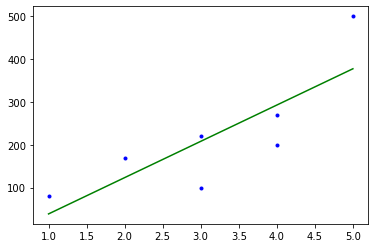

In [46]:
import matplotlib.pyplot as plt
y_predict = linreg.predict(x)

plt.plot(x, y_predict, "g-") #g- means: use green as the color ("g"), and draw a line ("-")
plt.plot(x, y, "b.") #b. means: use blue as the color ("b"), and draw individual points (".")
plt.show()

## Gradient Descent for Linear Regression

$$y = mx + b$$
$$
\frac{\partial MSE}{\partial m} = \frac{-2}{n} \sum_{i=1}^n{((y_i-{\color{#26a6ed}(mx+b)}) \cdot x_i)} \\\\

\frac{\partial MSE}{\partial b} = \frac{-2}{n} \sum_{i=1}^n{(y_i-{\color{#26a6ed}(mx+b)})}
$$

$$
\nabla(MSE) = \left[\begin{array}{c} 

    \frac{-2}{n} \sum_{i=1}^n{((y_i-{\color{#26a6ed}(mx+b)}) \cdot x_i)} \\\\

    \frac{-2}{n} \sum_{i=1}^n{(y_i-{\color{#26a6ed}(mx+b)})}

\end{array}\right]
$$

In [49]:
dataset = np.array([
    (1,80),
    (2,170),
    (3,100),
    (3,220),
    (4,200),
    (4,270),
    (5,500)])

x = dataset[:,0]
y = dataset[:,1]

def add_intercept_ones(X):
    intercept_ones = np.ones((len(X),1)) # results in array( [ [1],..,[1] ] )
    X_b = np.c_[intercept_ones,X]
    return X_b

X_b = add_intercept_ones(x)

# Making Predictions
def create_function(theta):
    def f(X_b):
        return np.dot(X_b,theta)
    return f

# Calculating derivatives

def mse_derivative_m(X,y,y_predicted):
    return -(2/y.size) * sum(X * (y - y_predicted))
    
def mse_derivative_b(y,y_predicted):
    return -(2/y.size) * sum(y - y_predicted)

### Calculating the Loss 
$$MSE(m,b) = \frac{1}{n} \cdot ( (y_i-{\color{#26a6ed}y_{pred}})^T \cdot (y_i-{\color{#26a6ed}y_{pred}}) )$$

In [50]:
def mse(y, y_predicted):
    error = y-y_predicted
    loss = 1/(y.size) * np.dot(error.T, error)
    return loss

In [53]:
def gradient_descent(x, y, theta, criterion, number_of_iterations, learning_rate):
    X_b = add_intercept_ones(x)
    loss_history=[]
    for i in range(number_of_iterations):
        
        # predict and calculate loss
        f = create_function(theta) # create the current function
        y_predicted = f(X_b) # predict our entire x
        loss = criterion(y,y_predicted) # calculate the error
        loss_history.append(loss)
            
        # perform optimization
        gradient = np.array([mse_derivative_b(y,y_predicted), mse_derivative_m(x,y,y_predicted)]) # calculate gradient
        theta = theta - learning_rate * gradient #adjust m and b

        if i%10==0:
            print("Current Epoch: {}, Current Loss: {}".format(i,loss))
        
    return theta,loss_history

In [54]:
theta = np.array([0.,0.])
num_epochs = 200
learning_rate = 0.0075
ideal_theta, loss_history = gradient_descent(x, y, theta, mse, num_epochs, learning_rate)
ideal_theta

Current Epoch: 0, Current Loss: 65228.57142857143
Current Epoch: 10, Current Loss: 7238.891593802805
Current Epoch: 20, Current Loss: 6238.347951740184
Current Epoch: 30, Current Loss: 6202.096015302292
Current Epoch: 40, Current Loss: 6182.86618019306
Current Epoch: 50, Current Loss: 6164.615769307687
Current Epoch: 60, Current Loss: 6147.047846616225
Current Epoch: 70, Current Loss: 6130.132652256769
Current Epoch: 80, Current Loss: 6113.845862732123
Current Epoch: 90, Current Loss: 6098.164131391666
Current Epoch: 100, Current Loss: 6083.064980156502
Current Epoch: 110, Current Loss: 6068.526766034719
Current Epoch: 120, Current Loss: 6054.528650077142
Current Epoch: 130, Current Loss: 6041.050567506585
Current Epoch: 140, Current Loss: 6028.073198957181
Current Epoch: 150, Current Loss: 6015.577942782173
Current Epoch: 160, Current Loss: 6003.546888390466
Current Epoch: 170, Current Loss: 5991.962790573754
Current Epoch: 180, Current Loss: 5980.8090447873765
Current Epoch: 190, Cur

array([-1.89537946, 72.3849704 ])

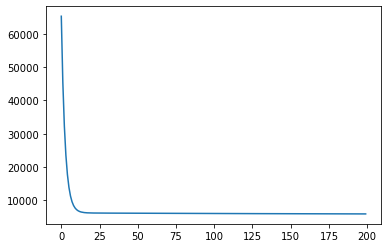

In [55]:
import matplotlib.pyplot as plt
plt.plot(np.arange(num_epochs),loss_history)

### Scikit-Learn

In [57]:
from sklearn.linear_model import SGDRegressor
X = np.array([[1], [2], [3], [3], [4], [4], [5]])
sgdreg = SGDRegressor(learning_rate="constant",eta0=0.0075,max_iter=200,random_state=42) #eta0 is our initial learning rate
sgdreg.fit(X,y)
print(sgdreg.coef_,sgdreg.intercept_)

[68.95520002] [12.285233]


# How to Split Your Dataset the Right Way

```python
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42, shuffle=True)
```

# Ridge Regression

$$Ridge\ Loss(y,y_{pred}) = MSE(y,y_{pred}) + ||\boldsymbol{\theta}||_2^2 \\$$
$$Ridge\ Loss(y,y_{pred}) = MSE(y,y_{pred}) + \sum_{i=1}^m{\theta_i^2} \\$$
$$Ridge\ Loss(y,y_{pred}) = MSE(y,y_{pred}) + \boldsymbol{\theta}^T\theta \\$$

## Solving Ridge Regression

### Normal Equation
$$\begin{aligned}

Ridge\ Loss(\textbf{y},\textbf{y}_{pred}) &= {\color{#26a6ed}MSE(\textbf{y},\textbf{y}_{pred})} + \alpha \cdot ||\boldsymbol{\theta}||_2^2 \\

&= {\color{#26a6ed}(\textbf{y} − \textbf{X}\boldsymbol{\theta})^T (\textbf{y} − \textbf{X}\boldsymbol{\theta})} + \alpha\boldsymbol{\theta}^T \boldsymbol{\theta}

\end{aligned}

$$

$$\hat{\boldsymbol{\theta}} = (\textbf{X}^T\textbf{X} + \alpha\textbf{I})^{-1} \textbf{X}^T \textbf{y} \\

$$

In [58]:
def normal_equation_ridge_regression(X,y,alpha):
    intercept_ones = np.ones((len(X),1))        # results in array( [ [1],..,[1] ] )
    X_b = np.c_[intercept_ones,X]               # we now add the additional ones as a new column to our X
    I = np.identity(X_b.shape[1])               # identity matrix with dimensions (n+1)
    I[0][0] = 0                                 # adjusting the first value in I to be 0, to account for the intercept term
    theta_optimal = np.linalg.inv(X_b.T.dot(X_b) + alpha * I).dot(X_b.T).dot(y) # the normal equation
    return theta_optimal

Using normal equation

```python
theta_ridge_ne_1 = normal_equation_ridge_regression(X_train, y_train, 1)
print(theta_ridge_ne_1)
# output: [44.35714286 -2.76190476]
```

Using scikit-learns Ridge-class
```python
ridge = Ridge()  # same as Ridge(alpha=1)
ridge.fit(X_train, y_train, 1)
theta_ridge_ne_2 = np.array([ridge.intercept_, ridge.coef_[0]])
print(theta_ridge_ne_2)
# output: [44.35714286 -2.76190476]
```

Ploting data 

```python
X_interval = np.array([min(X), max(X)]) # we'll use these points to plot our linear functions

plt.plot(X_train, y_train, "s", markersize=12, label="train data")
plt.plot(X_test, y_test, ".", markersize=15, label="test data")

plt.plot(X_interval, ols.predict(X_interval), label="ols")
plt.plot(X_interval, ridge.predict(X_interval) ,label="ridge")
plt.legend()
```

### Implementing Gradient Descent

$$\begin{aligned}
RidgeMSE(y,y_{pred}) &= {\color{#26a6ed}MSE(y,{\color{9628d9}y_{pred}})} + {\color{#54C667}\alpha \cdot \boldsymbol{\theta}^T\boldsymbol{\theta}} \\
&=  {\color{#26a6ed}\frac{1}{n} \cdot  ( (y-{\color{9628d9}y_{pred}})^T (y-{\color{9628d9}y_{pred}}) )} + {\color{#54C667}\alpha \cdot \boldsymbol{\theta}^T\boldsymbol{\theta}} \\
&=  {\color{#26a6ed}\frac{1}{n} \cdot  ( (y- {\color{9628d9}\mathbf{X}_b \boldsymbol{\theta}} )^T (y- {\color{9628d9}\mathbf{X}_b \boldsymbol{\theta}}) )} + {\color{#54C667}\alpha \cdot \boldsymbol{\theta}^T\boldsymbol{\theta}}
\end{aligned}$$

$$\begin{aligned}
\nabla(RidgeMSE) &=  {\color{#26a6ed}\frac{-2}{n} \mathbf{X}_b^T (y - {\color{9628d9}y_{pred}} )} + {\color{#54C667}2 \cdot \alpha \cdot \boldsymbol{\theta}} \\
&= {\color{#26a6ed}\frac{-2}{n} \mathbf{X}_b^T (y -  {\color{9628d9}\mathbf{X}_b \boldsymbol{\theta}})} + {\color{#54C667}2 \cdot \alpha \cdot \boldsymbol{\theta}}
\end{aligned}$$

In [64]:
def getRidgeGradientFunction(alpha=0.0001):
    
    def ridgeGradient(X_b, y, y_pred, theta):
        return  -(2/y.size) * X_b.T.dot((y - y_pred)) + alpha * theta

    return ridgeGradient

def getRidgeMSEFunction(alpha=0.0001):
    
    def ridgeMSE(y, y_predicted, theta):
        mse_loss = mse(y, y_predicted)
        ridge_loss = mse_loss + alpha * np.dot(theta,theta)
        return ridge_loss

    return ridgeMSE


def gradientDescent(X, y, theta, criterion, gradientFunction, number_of_iterations, learning_rate):
    X_b = add_intercept_ones(X)
    for i in range(number_of_iterations):

        # predict and calculate loss
        f = create_function(theta)               # create the current function
        y_predicted = X_b.dot(theta)             # predict our entire x
        loss = criterion(y, y_predicted, theta)  # calculate loss

        # perform optimization
        gradient = gradientFunction(X_b, y, y_predicted, theta) # compute gradient
        theta = theta - learning_rate * gradient                # adjust theta

    return theta



```python
theta_ridge_gd_1 = gradientDescent(X_train, y_train, theta, getRidgeMSEFunction(0.0001),
                                            getRidgeGradientFunction(0.0001), 1000, 0.03)
print(theta_ridge_gd_1)
# output: [44.41801778 -3.11386069]
```

```python
plt.plot(X_train, y_train, "s", markersize=12, label="train data")
plt.plot(X_test, y_test, ".", markersize=15, label="test data")

plt.plot(X, X_b.dot(theta_ridge_gd_1), label="ridge gd")
plt.plot(X, X_b.dot(theta_ridge_ne_1), label="ridge ne")
plt.legend()
plt.show()
```

### SGDRegressor-class

```python
sgdreg_ridge = SGDRegressor(penalty="l2", learning_rate="constant", eta0=0.001, max_iter=10000, random_state=42)
sgdreg_ridge.fit(X_train,y_train)
theta_ridge_gd_2 = np.array([sgdreg_ridge.intercept_[0], sgdreg_ridge.coef_[0]])
print(theta_ridge_gd_2)
# output: [43.1764243 -2.0467813]
```

## Finding the Optimal Value for $\alpha$

```python
ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10])
ridge_cv.fit(X_train, y_train)
print(ridge_cv.alpha_)
# output: 0.1
```

# Lasso Regression

$$New\ Loss\ 1(y,y_{pred}) = MSE(y,y_{pred}) + \alpha \sum_{i=1}^m{{\color{#26a6ed}\theta_i^2}} = {\color{#26a6ed}RidgeMSE} \\

New\ Loss\ 2(y,y_{pred}) = MSE(y,y_{pred}) + \alpha \sum_{i=1}^m{{\color{#26a6ed}|\theta_i|}} = {\color{#26a6ed}LassoMSE}

$$

$LassoMSE(y,y_{pred}) = MSE(y,y_{pred}) + \alpha ||\boldsymbol{\theta}||_1 \\$

## Solving Lasso Regression

$$\begin{aligned}
LassoMSE(y,y_{pred},\boldsymbol{\theta}) &= MSE(y,y_{pred}) + \alpha \cdot \sum_{i=1}^m{|\theta_i|} \\

\nabla(LassoMSE) &= \nabla(MSE(y,y_{pred})) + \alpha \cdot {\color{#FF8900}\nabla(\sum_{i=1}^m{|\theta_i|})} \\

&= \nabla(MSE(y,y_{pred})) + \alpha \cdot \sum_{i=1}^m{{\color{#FF8900}\nabla(|\theta_i|)}}
\end{aligned}$$

### Implementing Lasso using Scikit-Learn

```python
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

scaler = StandardScaler()
scaler.fit(X_train)
X_s_train = scaler.transform(X_train)
X_s_test = scaler.transform(X_test)

lasso = Lasso()
lasso.fit(X_s_train, y_train)
print(lasso.coef_[0], lasso.intercept_)
# prints: -2.5269426990176953 40.63053220519125

# OR

pipeline = make_pipeline(StandardScaler(), Lasso())
pipeline.fit(X_train, y_train)
print(pipeline[1].coef_[0], pipeline[1].intercept_)
# prints: -2.5269426990176953 40.63053220519125

# OR: SGDRegressor
pipeline_sgd = make_pipeline(StandardScaler(), SGDRegressor(alpha=1, penalty="l1"))
pipeline_sgd.fit(X_train, y_train)
print(pipeline_sgd[1].coef_[0], pipeline_sgd[1].intercept_)
# prints: -2.2233194459768386 [40.87110655]

```

## Finding the Optimal Value for $\alpha$

```python
lasso_cv_pipeline = make_pipeline(StandardScaler(),
                                  LassoCV(alphas=[0.1, 1.0, 10]))
lasso_cv_pipeline.fit(X_train, y_train)
print(lasso_cv_pipeline[1].alpha_)
# output: 0.1

```

# Elastic Net Regression

$$\begin{aligned}
{\color{#26a6ed}RidgeMSE}(y,y_{pred}) &= MSE(y,y_{pred}) + \alpha \sum_{i=1}^m{{\color{#26a6ed}\theta_i^2}} \\
&= MSE(y,y_{pred}) + \alpha {\color{#26a6ed}||\boldsymbol{\theta}||_2^2} \\
\end{aligned}

\\

\begin{aligned}
{\color{#26a6ed}LassoMSE}(y,y_{pred}) &= MSE(y,y_{pred}) + \alpha \sum_{i=1}^m{{\color{#26a6ed}|\theta_i|}} \\
&= MSE(y,y_{pred}) + \alpha {\color{#26a6ed}||\boldsymbol{\theta}||_1} \\
\end{aligned}$$

<hr>

$$\begin{aligned}
{\color{#26a6ed}ElasticNetMSE} &= MSE(y,y_{pred}) + \alpha_1 \sum_{i=1}^m{{\color{#26a6ed}|\theta_i|}} +  \alpha_2 \sum_{i=1}^m{{\color{#26a6ed}\theta_i^2}} \\
&= MSE(y,y_{pred}) + \alpha_1 {\color{#26a6ed}||\boldsymbol{\theta}||_1} + \alpha_2 {\color{#26a6ed}||\boldsymbol{\theta}||_2^2}  \\
\end{aligned}$$

## Solving Elastic Net

```python
elastic_pipeline = make_pipeline(StandardScaler(),
                                  ElasticNet(alpha=1, l1_ratio=0.1))
elastic_pipeline.fit(X_train, y_train)
print(elastic_pipeline[1].intercept_, elastic_pipeline[1].coef_)
# output: 41.0 [-1.2127174]

OR:
elastic_sgd_pipeline = make_pipeline(StandardScaler(), SGDRegressor(alpha=1, l1_ratio=0.1, penalty = "elasticnet"))
                         
elastic_sgd_pipeline.fit(X_train, y_train)

print(elastic_sgd_pipeline[1].intercept_, elastic_sgd_pipeline[1].coef_)
# output: [40.69570804] [-1.21309447]
```

## Finding the optimal value for $\alpha$ and the L1-ratio

```python
elastic_cv_pipeline = make_pipeline(StandardScaler(),
                                  ElasticNetCV(l1_ratio=0.1))
elastic_cv_pipeline.fit(X_train, y_train)
print(elastic_cv_pipeline[1].alpha_)
# output: 0.6385668121344372
```

## A Summary of Scikit-Learn-Classes

| MODEL / SOLVER | NORMAL EQUATION                                                                                                                             | GRADIENT DESCENT VARIANT                                                                                                                                                                |
| -------------- | ------------------------------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| OLS Regression | [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linearregression) | [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)                                                                                |
| Ridge          | [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)                                                  | [SGDRegressor with penalty=“l2”](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)                                                              |
| Lasso          | /                                                                                                                                           | [Lasso \[Coordinate Descent\] or SGDRegressor with penalty=“l1” \[Truncated SGD\]](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)                   |
| Elastic Net    | /                                                                                                                                           | [ElasticNet \[Coordinate Descent\] or SGDRegressor with penalty=“elasticnet” \[Truncated SGD\]](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) |

# When, Why, And How You Should Standardize Your Data
$$ \large z = \frac{x - \mu}{\sigma}$$

```python
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

X_train_mean = np.mean(X_train)
X_train_std = np.std(X_train)

X_train_standardized = (X_train - X_train_mean) / X_train_std
X_test_standardized = (X_test - X_train_mean) / X_train_std

ridge = Ridge()
ridge.fit(X_train_standardized, y_train)
print(ridge.intercept_, ridge.coef_[0])
# outputs: 40.7 -1.56

ridge_predictions = ridge.predict(X_test_standardized)
print(ridge_predictions)
# outputs: [40.48 41.35 39.61]

```

## Implementing Standardization using Scikit-Learn’s StandardScaler

```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_standardized = scaler.transform(X_train)
X_test_standardized = scaler.transform(X_test)
```

Instead of writing 

`scaler.fit(X_train)` and `X_train_standardized = scaler.transform(X_train)` 

we can also just write 

`X_train_standardized = scaler.fit_transform(X_train)` 

to save us one line of code.

## Implementing Standardization using Scikit-Learn’s Pipeline

```python
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('scaler', StandardScaler()),
                    ('ridge', Ridge())])
```

OR:

```python
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(StandardScaler(), Ridge())  
pipeline.fit(X_train, y_train)
print(pipeline[1].intercept_, pipeline[1].coef_[0])
# 40.7 -1.56
pipeline_predictions = ridge.predict(X_test_standardized)
print(pipeline_predictions)
# [40.48 41.35 39.61]

```




# Subgradient Descent

In [67]:
# from the gradient descent for linear regression article
def create_function(theta):
    def f(X_b):
        return np.dot(X_b,theta)
    
    return f

# from the gradient descent for linear regression article
def add_intercept_ones(X):
    intercept_ones = np.ones((len(X),1)) # results in array( [ [1],..,[1] ] )
    X_b = np.c_[intercept_ones,X]
    return X_b

# from the standardization article
def standardize(X_train, X_test):
    mean = np.mean(X_train)
    std = np.std(X_train)
    X_train_s = (X_train - mean) / std 
    X_test_s = (X_test - mean) / std 
    return X_train_s, X_test_s, mean, std

In [68]:
X = np.array([1.25, 1.  , 0.75, 1.5, 1.75, 1.5 , 0.75])
y = np.array([40. , 42. , 46. , 37., 40. , 38. , 39.8])

X_train, X_test = X[:4], X[4:]
y_train, y_test = y[:4], y[4:]

X_train_s, X_test_s, _, _ = standardize(X_train, X_test)

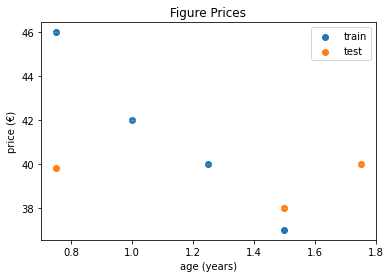

In [69]:
plt.scatter(X_train, y_train, label="train")
plt.scatter(X_test, y_test, label="test")
plt.xlabel("age (years)")
plt.ylabel("price (€)")
plt.title("Figure Prices")
plt.grid(color = 'white', alpha=0.5, linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

## Subgradients

$$\text{A vector } g \in \mathbb{R}^d \text{ is a subgradient of a function } \\
f: \mathbb{R}^d \rightarrow \mathbb{R} \text{ at the point } x_0 \text{ if for all points } x \text{ the following holds:} \\
f(x) \geq  {\color{#26a6ed}f(x_0)} + g(x {\color{#26a6ed} - x_0})

$$

## Loss and gradient functions

In [70]:
def get_elastic_mse_function(a2=1, a1=0):
    
    def elastic_mse(y, y_predicted, theta):
        error = y-y_predicted
        loss = 1/(y.size) * np.dot(error.T, error) + a2 * np.dot(theta,theta) + a1 * np.sum(np.abs(theta))
        return loss
    
    return elastic_mse


def get_elastic_gradient_function(a2=1, a1=0):
    
    def elastic_gradient(X_b, y, y_pred, theta):
        return  -(2/y.size) * X_b.T.dot((y - y_pred)) + a1 * np.sign(theta) + 2 * a2 * theta

    return elastic_gradient

## Subgradient descent

In [71]:
def subgradient_descent(X, y, theta, criterion, subgradient_function, number_of_iterations, learning_rate):
    X_b = add_intercept_ones(X)
    for i in range(number_of_iterations):

        # predict and calculate loss
        f = create_function(theta) # create the current function
        y_predicted = f(X_b) # predict our entire x
        loss = criterion(y, y_predicted, theta) # calculate the error

        # perform optimization
        subgradient = subgradient_function(X_b, y, y_predicted, theta) # calculate gradient
        theta = theta - learning_rate * subgradient #adjust m and b
        
    return theta

In [72]:
theta = np.random.rand(2)
number_of_iterations = 3000
learning_rate = 0.01

# important: use standardized data!
theta_lasso_subgd = subgradient_descent(X_train_s, y_train, theta,
                    get_elastic_mse_function(a2=0, a1=1),
                    get_elastic_gradient_function(a2=0, a1=1),
                    number_of_iterations, learning_rate)
print(theta_lasso_subgd)

[40.75       -2.74229857]
